Dataset

In [10]:
import matplotlib.pyplot as plt
import numpy as np

from ImageTransferLearning import *

train_loader, test_loader = dataloaderSetup()

Example for image and label size

In [11]:
image, label = next(iter(train_loader))
print(f"batch shape of images: {image.size()}")
print(f"batch shape of labels: {label.size()}")

batch shape of images: torch.Size([3, 3, 224, 224])
batch shape of labels: torch.Size([3])


Examples for 4 batches from the training datasetloader



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

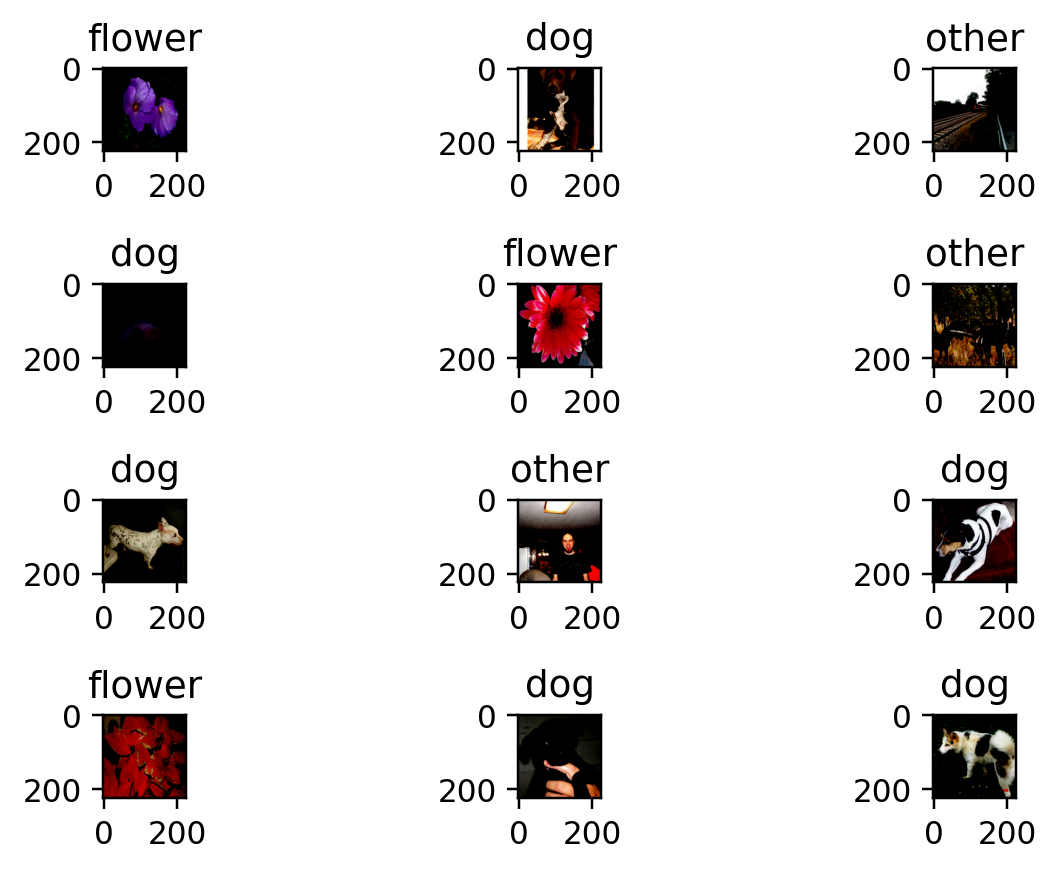

In [12]:
columns = 3
rows = 4
fig, ax = plt.subplots(rows, columns, dpi=224)
ax = ax.ravel()
for i, (image, labels) in enumerate(train_loader):
    if(i == rows):
        break
    for j, (img) in enumerate(image):
        np_array = img.numpy()
        np_array = np_array.swapaxes(0, 2)
        np_array = np.rot90(np_array, 3)
        ax[i*columns+j].imshow(np_array)
        ax[i*columns+j].set_title(all_classes[labels[j]]) # set title
fig.tight_layout()
plt.show()

In [13]:
from torchvision import models
from torchsummary import summary

device = "dml"
model = neuralNetSetup()
summary(model, input_size=(3,244,244))
model.to(device)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 122, 122]           9,408
       BatchNorm2d-2         [-1, 64, 122, 122]             128
              ReLU-3         [-1, 64, 122, 122]               0
         MaxPool2d-4           [-1, 64, 61, 61]               0
            Conv2d-5           [-1, 64, 61, 61]          36,864
       BatchNorm2d-6           [-1, 64, 61, 61]             128
              ReLU-7           [-1, 64, 61, 61]               0
            Conv2d-8           [-1, 64, 61, 61]          36,864
       BatchNorm2d-9           [-1, 64, 61, 61]             128
             ReLU-10           [-1, 64, 61, 61]               0
       BasicBlock-11           [-1, 64, 61, 61]               0
           Conv2d-12           [-1, 64, 61, 61]          36,864
      BatchNorm2d-13           [-1, 64, 61, 61]             128
             ReLU-14           [-1, 64,

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

Confusion matrix examples from training

In [14]:
num_epochs = 1

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
model = trainingPhase(model, criterion, optimizer, train_loader, num_epochs, 0.1, 0, device, confusionmatrixdevice, writer, FILE, all_classes, 0)

KeyboardInterrupt: 

Confusion matrix examples from testing

In [ ]:
testingPhase(model, test_loader, writer, FILE, all_classes, 0, confusionmatrixdevice)